In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import seaborn as sns
import matplotlib.pyplot as plt 
import os
from matplotlib.pyplot import figure


In [2]:
os.chdir('projectdata')
os.listdir('.')

['project_4.xlsx',
 'project_8.xlsx',
 'project_10.xlsx',
 'project_11.xlsx',
 'project_9.xlsx',
 'project_5.xlsx',
 'project_16.xlsx',
 'project_2.xlsx',
 'project_3.xlsx',
 'project_14.xlsx',
 'project_1.xlsx',
 '~$project_1.xlsx',
 'project_15.xlsx',
 'project_6.xlsx',
 'project_12.xlsx',
 'project_13.xlsx',
 'project_7.xlsx']

In [3]:
df=pd.read_excel('project_1.xlsx')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
Time            5000 non-null datetime64[ns]
Untitled        5000 non-null float64
diff            4999 non-null float64
acceleration    5000 non-null float64
time            1002 non-null float64
velocity        933 non-null float64
displacement    933 non-null float64
dtypes: datetime64[ns](1), float64(6)
memory usage: 273.5 KB


In [5]:
b=list(range(1000))
y=df['Untitled']
y_ex=y[3000:4000]

<function matplotlib.pyplot.show>

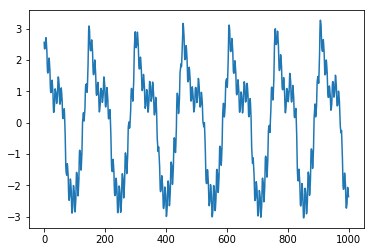

In [6]:
plt.plot(b,y_ex)
plt.show

In [7]:
y_diff=np.diff(y_ex)
a=list(range(999))

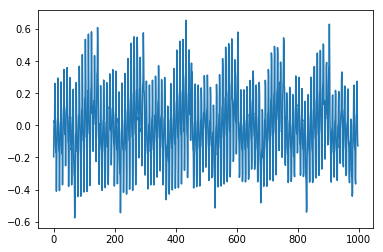

In [8]:
plt.plot(a,y_diff)
plt.show()

In [9]:
import statsmodels.tsa.stattools as ts
t=ts.adfuller(y_diff, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
print(t)

(-6.598231721953142, 6.8391882842274215e-09, 22, 976, {'5%': -2.8645058608075264, '1%': -3.4370678095881804, '10%': -2.568349178354273}, -3887.5140838284706)


In [10]:
from scipy import ndimage
im_med = ndimage.median_filter(y_ex, 11)

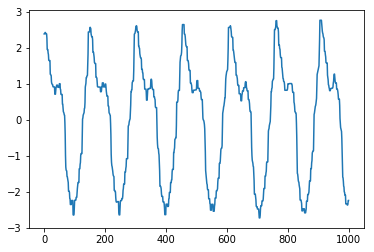

In [11]:
c=list(range(1000))
plt.plot(c,im_med)
plt.show()

In [12]:
mea = y_ex.ewm(span=7, adjust=False).mean()

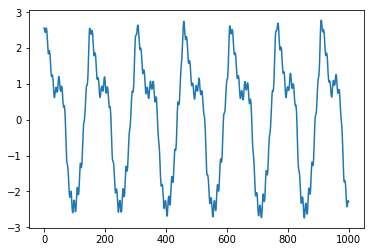

In [13]:
plt.plot(c,mea)
plt.show()

In [14]:
ep1=y[3103:3253]
ep2=y[3253:3403]
ep3=y[3403:3553] 
ep4=y[3554:3704] 
ep5=y[3705:3855] 


In [15]:
d=list(range(150))
ep1=np.array(ep1)
ep2=np.array(ep2)
ep3=np.array(ep3)
ep4=np.array(ep4)
ep5=np.array(ep5)

ave=(ep1+ep2+ep3+ep4+ep5)/5

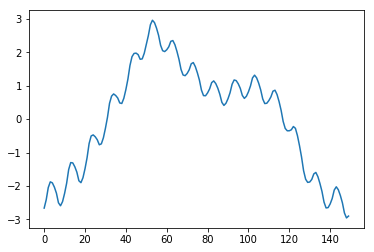

In [16]:
plt.plot(d,ave)
plt.show()

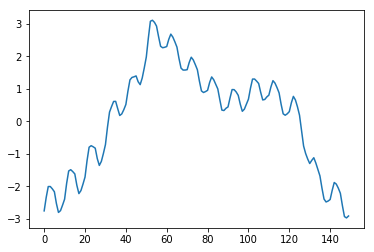

In [17]:
plt.plot(d,ep4)
plt.show()

In [18]:
from scipy import stats
z = np.abs(stats.zscore(y_ex))
print(z)

[1.52017346e+00 1.40151745e+00 1.39293064e+00 1.41166538e+00
 1.42103336e+00 1.57950117e+00 1.61072676e+00 1.53734708e+00
 1.43586529e+00 1.33906688e+00 1.09082634e+00 9.51093280e-01
 9.26893375e-01 9.46409291e-01 9.71389760e-01 1.15015405e+00
 1.21806917e+00 1.16108315e+00 1.06584587e+00 9.65144643e-01
 7.19245798e-01 5.79512736e-01 5.49848883e-01 5.58435692e-01
 5.71706491e-01 7.35638852e-01 7.90283174e-01 7.13000680e-01
 6.06834897e-01 5.24868414e-01 3.00827176e-01 1.68119796e-01
 1.75145477e-01 2.35254353e-01 3.11756283e-01 5.22526722e-01
 6.22447388e-01 6.03712036e-01 5.69364193e-01 5.52190575e-01
 3.99967278e-01 3.40639572e-01 3.83574224e-01 4.49927612e-01
 5.16281604e-01 7.34077724e-01 8.51953178e-01 8.41024072e-01
 7.80915196e-01 7.06755563e-01 4.76469209e-01 3.34394455e-01
 3.25807645e-01 3.61716616e-01 3.96064458e-01 5.76389875e-01
 6.41182739e-01 5.78732172e-01 4.87398315e-01 3.99186714e-01
 1.75145477e-01 5.18060753e-02 4.79026501e-02 7.99088004e-02
 9.55212911e-02 2.313509

In [19]:
threshold = 1.7
print(np.where(z > 1.7))

(array([ 91,  92,  93, 101, 102, 146, 147, 148, 149, 241, 242, 243, 251,
       252, 299, 306, 401, 402, 403, 455, 456, 457, 458, 551, 552, 553,
       554, 561, 606, 607, 608, 609, 701, 702, 703, 704, 711, 712, 713,
       758, 759, 766, 851, 852, 853, 854, 861, 862, 906, 907, 908, 909]),)


In [20]:
y_ex_out = y_ex[(z < 1.7)]

In [21]:
from scipy.interpolate import interp1d
import pylab
from scipy import interpolate

In [22]:
z=list(range(948))
f_cubic   = interp1d(z, y_ex_out, kind='cubic')

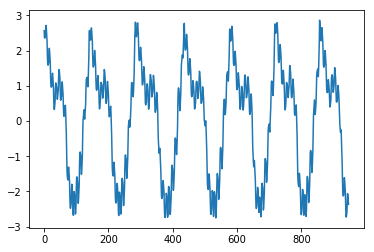

In [23]:
pylab.plot(z, f_cubic(z), label='cubic')

In [24]:
dis=df['displacement']
disp=dis[3070:4000]

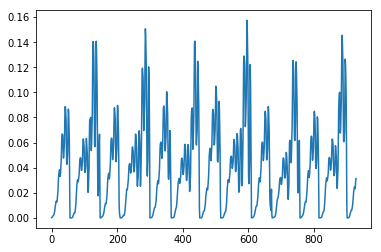

In [25]:
h=list(range(930))

plt.plot(h,disp)
plt.show()

In [26]:
velo=df['velocity']
veloc=velo[3070:4000]

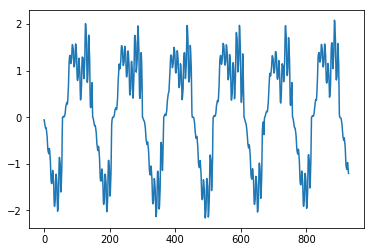

In [27]:
plt.plot(h,veloc)
plt.show()

In [28]:
epa1=dis[3129:3218] #89
epa2=dis[3282:3371] #89
epa3=dis[3436:3525] #89
epa4=dis[3592:3681] #89
epa5=dis[3742:3831] #89
epa6=dis[3886:3975] #89

In [29]:
dd=list(range(89))
epa1=np.array(epa1)
epa2=np.array(epa2)
epa3=np.array(epa3)
epa4=np.array(epa4)
epa5=np.array(epa5)
epa6=np.array(epa6)
avera=(epa1+epa2+epa3+epa4+epa5+epa6)/6

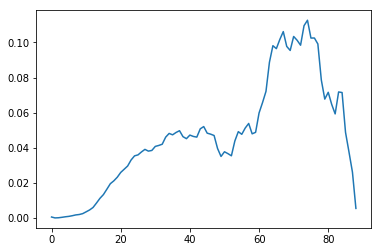

In [30]:
plt.plot(dd,avera)
plt.show()

In [31]:
dis_diff=np.diff(disp)
ee=list(range(929))

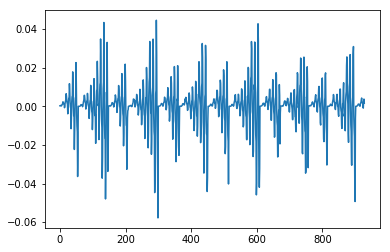

In [32]:
plt.plot(ee,dis_diff)
plt.show()

In [33]:
t_dis=ts.adfuller(dis_diff, maxlag=None, regression='c', autolag='AIC', store=False, regresults=False)
print(t_dis)

(-9.044175553586522, 5.038847634507518e-15, 21, 907, {'5%': -2.8647318597670877, '1%': -3.4375803238413085, '10%': -2.568469555703587}, -6956.1183571160855)


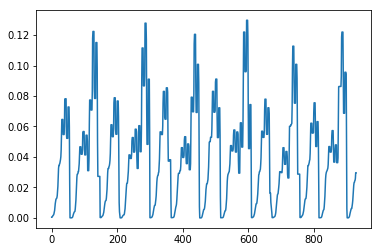

In [49]:
im_meddis = ndimage.median_filter(disp, 7)
plt.plot(h,im_meddis)
plt.show()

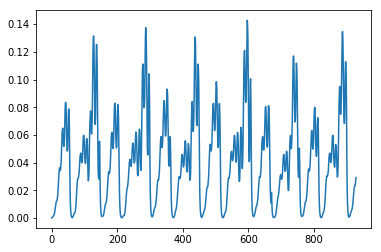

In [40]:
meadis = disp.ewm(span=3, adjust=False).mean()
plt.plot(h,meadis)
plt.show()

In [41]:
zdis = np.abs(stats.zscore(disp))
print(zdis)

[1.22508632e+00 1.21737096e+00 1.20754904e+00 1.19620283e+00
 1.18284298e+00 1.17820559e+00 1.16903978e+00 1.14852821e+00
 1.12013605e+00 1.08594240e+00 1.01767276e+00 9.53408194e-01
 9.08777532e-01 8.72872371e-01 8.38848515e-01 8.60361065e-01
 8.56247847e-01 8.00384714e-01 7.18619920e-01 6.18714568e-01
 4.27334108e-01 2.72911809e-01 1.91942901e-01 1.43415731e-01
 1.04830694e-01 2.19307515e-01 2.58379213e-01 1.76149674e-01
 5.18297876e-02 8.40492669e-02 4.28219855e-01 6.67787147e-01
 7.34617203e-01 7.27068406e-01 6.95814779e-01 3.54646796e-01
 1.69975664e-01 2.33180524e-01 3.77261777e-01 5.36643651e-01
 1.06037640e+00 1.37689474e+00 1.37327028e+00 1.22907096e+00
 1.06612732e+00 4.09339727e-01 2.30925110e-02 3.75886294e-02
 1.66170818e-01 3.03903474e-01 9.69214790e-01 1.31536218e+00
 1.20806994e+00 9.08107933e-01 5.21295895e-01 5.47369398e-01
 1.23017227e+00 1.23009713e+00 1.22970220e+00 1.22853238e+00
 1.22874410e+00 1.22940937e+00 1.22658412e+00 1.22091605e+00
 1.21256205e+00 1.187586

In [42]:
threshold = 1.7
print(np.where(zdis > 1.7))
disp_out = disp[(zdis < 1.7)]

(array([125, 126, 127, 128, 129, 135, 136, 137, 138, 276, 277, 278, 279,
       285, 286, 287, 288, 289, 296, 297, 351, 435, 436, 437, 438, 439,
       445, 446, 447, 448, 501, 502, 586, 587, 588, 589, 595, 596, 597,
       598, 599, 606, 607, 736, 737, 738, 739, 745, 746, 747, 748, 879,
       885, 886, 887, 888, 889, 896, 897, 898]),)


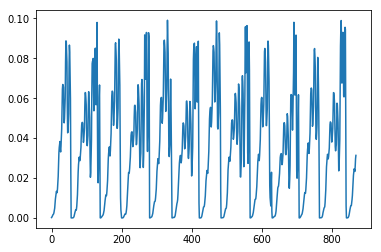

In [46]:
zz=list(range(870))
f_cubic   = interp1d(zz, disp_out, kind='cubic')
pylab.plot(zz, f_cubic(zz), label='cubic')